In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from scipy.spatial.distance import cdist
import time
from tqdm import tqdm
%load_ext autoreload
%autoreload 1
#%aimport __pycache__.lddt.cpython-39
%aimport sautils.encoder_commons
%aimport sautils.common
%aimport torch
import pandas as pd

In [2]:
sid2seq_ss = {}
with open('data/ss.fasta') as file:
    sid = ''
    for line in file:
        line = line.lstrip('>').rstrip('\n')
        if not sid:
            sid = line
        else:
            sid2seq_ss[sid] = line.upper()
            sid = ''
sid2seq_aa = {}
with open('data/aa.fasta') as file:
    sid = ''
    for line in file:
        line = line.lstrip('>').rstrip('\n')
        if not sid:
            sid = line
        else:
            sid2seq_aa[sid] = line.upper()
            sid = ''
mat3di = np.load('data/mat3di.npy') * 2.1
blosum = np.load('data/blosum62.npy') * 1.4
with open('data/mat3di.out') as f:
    lines = f.readlines()
i2a = lines[3].split()
def seq2num(q):
    idx = []
    for a in q:
        idx.append(i2a.index(a))
    return np.array(idx)
    
def calcS_np(ss1,ss2 ,aa1, aa2,mat3di, blosum):
    ss1 = seq2num(ss1)
    ss2 = seq2num(ss2)
    aa1 = seq2num(aa1)
    aa2 = seq2num(aa2)
    comb_array_ss = np.array(np.meshgrid(ss1, ss2)).T.reshape(-1, 2)
    comb_array_aa = np.array(np.meshgrid(aa1, aa2)).T.reshape(-1, 2)
    S = (mat3di[comb_array_ss[:,0],comb_array_ss[:,1]].reshape(len(ss1),-1)) + blosum[comb_array_aa[:,0],comb_array_aa[:,1]].reshape(len(aa1),-1)
    return S
def distances(q_points_aln, t_points_aln):
    d_mat = cdist(q_points_aln, t_points_aln)
    return (d_mat)

In [3]:
coord_dir = 'data/pdb/d*'
if not os.path.exists(coord_dir):
    print('Creating cache first.')
    sautils.encoder_commons.init_coords('data/pdb/d*', coord_dir)
sid2coords = {sid: sautils.encoder_commons.read_coords(coord_dir, sid) for sid in sautils.encoder_commons.list_sids(coord_dir)}

In [4]:
res_0 = pd.read_csv("100vsall/100vsall2/results_0.csv", header = None, delimiter= "\t")
res_1 = pd.read_csv("100vsall/100vsall2/results_15.csv", header = None, delimiter= "\t")
res_2 = pd.read_csv("100vsall/100vsall2/results_30.csv", header = None, delimiter= "\t")
res_3 = pd.read_csv("100vsall/100vsall2/results_45.csv", header = None, delimiter= "\t")
res_4 = pd.read_csv("100vsall/100vsall2/results_60.csv", header = None, delimiter= "\t")
res_5 = pd.read_csv("100vsall/100vsall2/results_75.csv", header = None, delimiter= "\t")
res_6 = pd.read_csv("100vsall/100vsall2/results_90.csv", header = None, delimiter= "\t")
res = [res_0,res_1,res_2,res_3,res_4,res_5,res_6]

In [5]:
query, target, di_score, rescale_score, di_rescale = [],[],[],[], []
qc, tc = [],[]


In [6]:
for r in res:
    for n,di,rescale in tqdm(zip(r[0].values, r[1].values, r[2].values), total = r[2].values.shape[0]):
        query.append(n[:7])
        target.append(n[8:])
        di_score.append(di)
        rescale_score.append(rescale)
        aa1 = sid2seq_aa[n[:7]]
        aa2 = sid2seq_aa[n[8:]]
        di_rescale.append(di/np.sqrt(len(aa1)*len(aa2)))
        if(type(di/np.sqrt(len(aa1)*len(aa2))) != np.float64):
            print(np.sqrt(len(aa1)*len(aa2)))
        #print(df_result[df_result[0] == n[:7]][1].values)
        #qc.append(df_result[df_result[0] == n[:7]][1].values)
        #tc.append(df_result[df_result[0] == n[8:]][1].values)

100%|███████████████████████████████| 112110/112110 [00:00<00:00, 208932.19it/s]


In [7]:
df = pd.DataFrame((query,target,di_score,rescale_score, di_rescale)).T

In [72]:
df = df.sort_values([0,3], ascending=[False, False])

In [73]:
df.to_csv("100vsall/100vsall2/results_rescale.tsv", sep="\t", header=False, index = False)

In [74]:
df

,0,1,2,3,4
437268,d3pt8a_,d3pt8a_,9021.002564,59.779011,59.741739
437246,d3pt8a_,d1b0ba_,5647.431123,38.88214,38.567217
437235,d3pt8a_,d1urva_,5517.899422,36.817228,36.184697
437254,d3pt8a_,d1naza_,5380.918028,35.886416,35.286415
437253,d3pt8a_,d1mbaa_,4904.346354,33.491276,33.030582
...,...,...,...,...,...
178568,d1alla_,d1p4ta_,-21.201606,0.955063,-0.13463
172223,d1alla_,d3zzsa_,-27.453907,0.932736,-0.269208
170507,d1alla_,d1g0da3,-25.526558,0.915807,-0.200804
178572,d1alla_,d3qraa_,-21.766418,0.816115,-0.139574


In [47]:
scope_di = pd.read_csv("100vsall/100vsall2/result_highGPTop5.rocx", delimiter= "\t")
scope_direscale = pd.read_csv("100vsall/100vsall2/result_highGPrescaleTop5.rocx", delimiter= "\t")
scope_rescale = pd.read_csv("100vsall/100vsall2/result_fsTop5.rocx", delimiter= "\t")
scope_dali = pd.read_csv("100vsall/100vsall2/result_daliTop5.rocx", delimiter= "\t")


In [48]:
#scope_di = scope_di[scope_di["FAM"] != 0]
scope_di = scope_di[scope_di["NAME"].isin(df[0])]
scope_direscale = scope_direscale[scope_direscale["NAME"].isin(df[0])]
scope_rescale = scope_rescale[scope_rescale["NAME"].isin(df[0])]
scope_dali = scope_dali[scope_dali["NAME"].isin(df[0])]

In [49]:
scope_di

,NAME,SCOP,FAM,SFAM,FOLD,FP,FAMCNT,SFAMCNT,FOLDCNT
77,d2v33a_,b.1.18.4,0,"0,0833333","0,0582822",5,4,76,402
112,d2nqca1,b.1.18.10,"0,7","0,123077","0,0490798",5,11,76,402
117,d1m6ba1,c.10.2.5,1,"0,411765",0,5,6,23,29
146,d2ifga1,b.1.1.4,"0,65","0,638554","0,0581395",5,61,144,402
156,d2bhua1,b.1.18.2,"0,428571","0,222222","0,165644",5,22,76,402
...,...,...,...,...,...,...,...,...,...
3254,d1uw4b_,a.118.1.14,"0,75","0,542857","0,0895522",5,9,44,111
3310,d1bupa1,c.55.1.1,"0,9","0,894737","0,5",5,11,68,130
3332,d1irxa2,c.26.1.1,1,"0,705882","0,314286",5,21,38,73
3382,d1kcqa_,d.109.1.1,1,1,"0,666667",5,7,15,18


In [50]:
di_fam, di_sfam, di_fold = [], [], []
for f, sf, fo in zip (scope_di["FAM"],scope_di["SFAM"],scope_di["FOLD"]):
    di_fam.append(float(f.replace(',', '.')))
    di_sfam.append(float(sf.replace(',', '.')))
    di_fold.append(float(fo.replace(',', '.')))

In [51]:
dires_fam, dires_sfam, dires_fold = [], [], []
for f, sf, fo in zip (scope_direscale["FAM"],scope_direscale["SFAM"],scope_direscale["FOLD"]):
    dires_fam.append(float(f.replace(',', '.')))
    dires_sfam.append(float(sf.replace(',', '.')))
    dires_fold.append(float(fo.replace(',', '.')))

In [52]:
di_fam_res, di_sfam_res, di_fold_res = [], [], []
for f_res, sf_res, fo_res in zip (scope_rescale["FAM"],scope_rescale["SFAM"],scope_rescale["FOLD"]):
    di_fam_res.append(float(f_res.replace(',', '.')))
    di_sfam_res.append(float(sf_res.replace(',', '.')))
    di_fold_res.append(float(fo_res.replace(',', '.')))

In [53]:
dali_fam, dali_sfam, dali_fold = [], [], []
for f, sf, fo in zip (scope_dali["FAM"],scope_dali["SFAM"],scope_dali["FOLD"]):
    dali_fam.append(float(f.replace(',', '.')))
    dali_sfam.append(float(sf.replace(',', '.')))
    dali_fold.append(float(fo.replace(',', '.')))

In [54]:
sfam_max = np.max([di_sfam,dires_sfam], axis = 0)
fam_max = np.max([di_fam,dires_fam], axis = 0)
fold_max = np.max([di_fold,dires_fold], axis = 0)

In [55]:
np.sort(di_sfam)[::-1]

array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 0.986667 , 0.98     , 0.978261 , 0.972973 , 0.967742 ,
       0.961538 , 0.957143 , 0.954545 , 0.952381 , 0.95122  , 0.95122  ,
       0.95082  , 0.921053 , 0.918919 , 0.894737 , 0.875    , 0.866667 ,
       0.857143 , 0.857143 , 0.857143 , 0.857143 , 0.853333 , 0.827225 ,
       0.814815 , 0.8125   , 0.809524 , 0.802198 , 0.787879 , 0.769231 ,
       0.75641  , 0.75     , 0.747475 , 0.73913  , 0.727273 , 0.714286 ,
       0.714286 , 0.705882 , 0.682927 , 0.666667 , 0.666667 , 0.666667 ,
       0.642857 , 0.638554 , 0.625    , 0.6      , 0.6      , 0.6      ,
       0.568421 , 0.542857 , 0.485714 , 0.469388 , 

In [56]:
scale = np.arange(0,1,0.01)

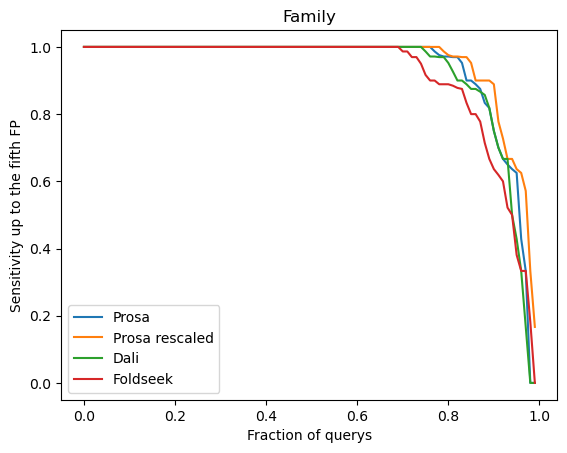

In [57]:
plt.plot(scale, np.sort(di_fam)[::-1], label = "Prosa")
plt.plot(scale, np.sort(dires_fam)[::-1], label = "Prosa rescaled")
plt.plot(scale, np.sort(dali_fam)[::-1], label = "Dali")
plt.plot(scale, np.sort(di_fam_res)[::-1],  label = "Foldseek")
#plt.plot(scale, np.sort(fam_max)[::-1],  label = "max")
plt.title("Family")
plt.xlabel('Fraction of querys')
plt.ylabel("Sensitivity up to the fifth FP")
plt.legend()
plt.show()

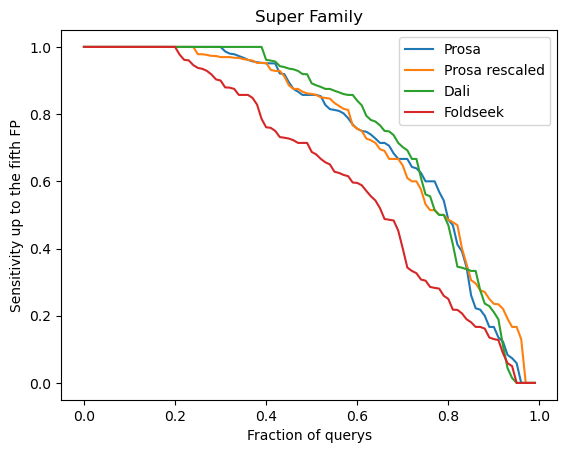

In [58]:
plt.plot(scale, np.sort(di_sfam)[::-1], label = "Prosa")
plt.plot(scale, np.sort(dires_sfam)[::-1], label = "Prosa rescaled")
plt.plot(scale, np.sort(dali_sfam)[::-1], label = "Dali")
plt.plot(scale, np.sort(di_sfam_res)[::-1],  label = "Foldseek")
#plt.plot(scale, np.sort(sfam_max)[::-1],  label = "max")
plt.title("Super Family")
plt.xlabel('Fraction of querys')
plt.ylabel("Sensitivity up to the fifth FP")
plt.legend()
plt.show()

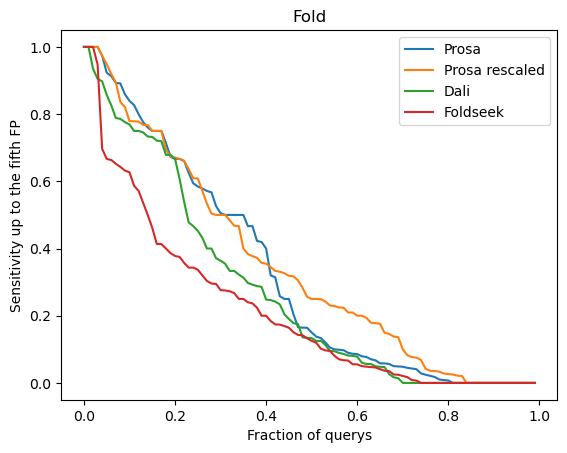

In [59]:
plt.plot(scale, np.sort(di_fold)[::-1], label = "Prosa")
plt.plot(scale, np.sort(dires_fold)[::-1], label = "Prosa rescaled")
plt.plot(scale, np.sort(dali_fold)[::-1], label = "Dali")
plt.plot(scale, np.sort(di_fold_res)[::-1],  label = "Foldseek")
#plt.plot(scale, np.sort(fold_max)[::-1],  label = "max")

plt.title("Fold")
plt.xlabel('Fraction of querys')
plt.ylabel("Sensitivity up to the fifth FP")
plt.legend()
plt.show()

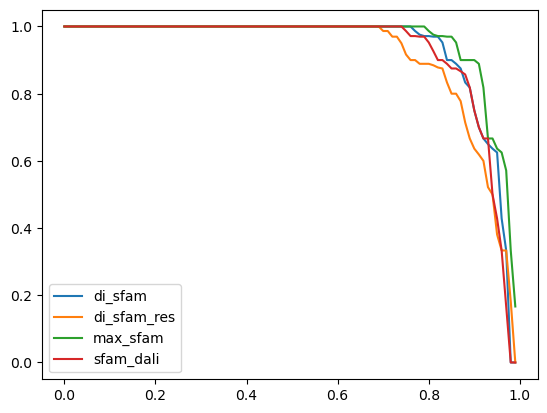

In [60]:
plt.plot(scale, np.sort(di_fam)[::-1], label = "di_sfam")
plt.plot(scale, np.sort(di_fam_res)[::-1],  label = "di_sfam_res")
plt.plot(scale, np.sort(fam_max)[::-1], label = "max_sfam")
plt.plot(scale, np.sort(dali_fam)[::-1], label = "sfam_dali")
plt.legend()
plt.show()

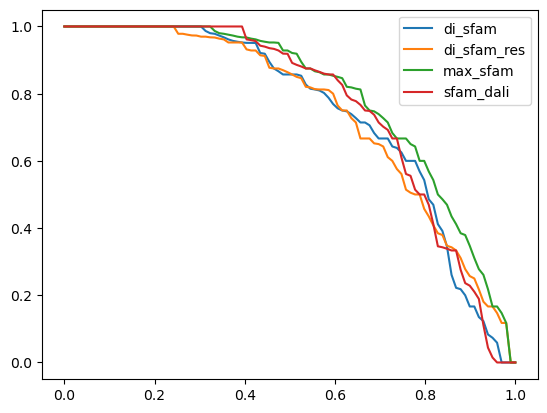

In [151]:
plt.plot(scale, np.sort(di_sfam)[::-1], label = "di_sfam")
plt.plot(scale, np.sort(di_sfam_res)[::-1],  label = "di_sfam_res")
plt.plot(scale, np.sort(sfam_max)[::-1], label = "max_sfam")
plt.plot(scale, np.sort(dali_sfam)[::-1], label = "sfam_dali")
plt.legend()
plt.show()

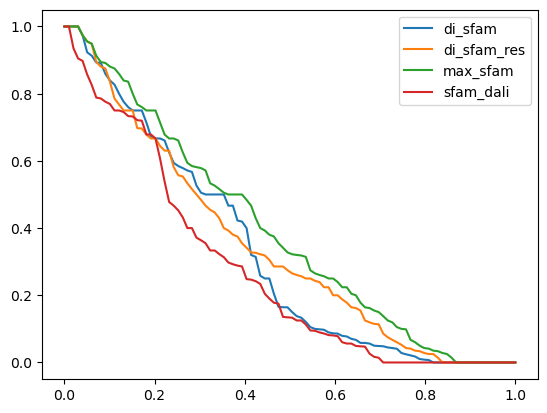

In [152]:
plt.plot(scale, np.sort(di_fold)[::-1], label = "di_sfam")
plt.plot(scale, np.sort(di_fold_res)[::-1],  label = "di_sfam_res")
plt.plot(scale, np.sort(fold_max)[::-1], label = "max_sfam")
plt.plot(scale, np.sort(dali_fold)[::-1], label = "sfam_dali")
plt.legend()
plt.show()

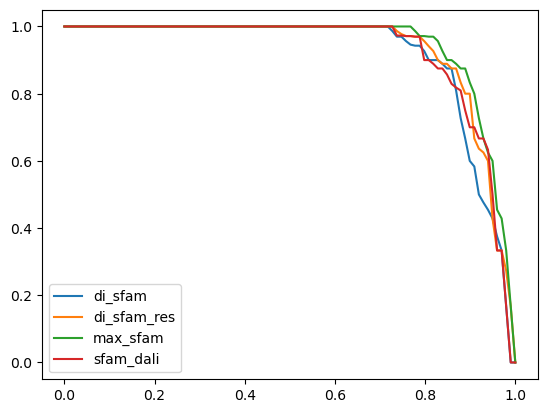

In [128]:
plt.plot(scale, np.sort(di_fam)[::-1], label = "di_sfam")
plt.plot(scale, np.sort(di_fam_res)[::-1],  label = "di_sfam_res")
plt.plot(scale, np.sort(fam_max)[::-1], label = "max_sfam")
plt.plot(scale, np.sort(dali_fam)[::-1], label = "sfam_dali")
plt.legend()
plt.show()

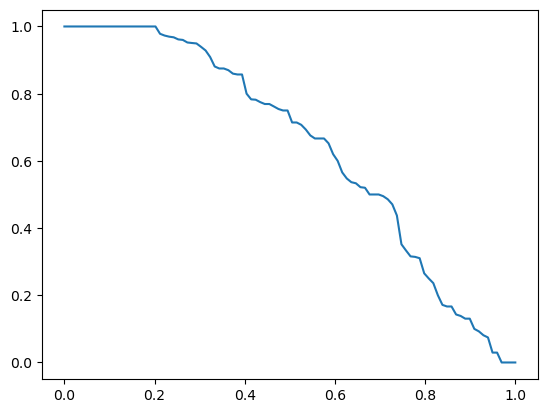

In [101]:
plt.plot(scale, np.sort(di_sfam_res)[::-1])

In [24]:
print(np.array(dires_fam).mean(), np.array(di_fam).mean(), np.array(di_fam_res).mean(), np.array(dali_fam).mean())
print(np.array(dires_sfam).mean(), np.array(di_sfam).mean(), np.array(di_sfam_res).mean(), np.array(dali_sfam).mean())
print(np.array(dires_fold).mean(), np.array(di_fold).mean(), np.array(di_fold_res).mean(), np.array(dali_fold).mean())

0.93249961 0.9110088300000001 0.8818316200000001 0.92031204
0.6439861170000001 0.629519006 0.521951221 0.6236254999999999
0.213820913 0.18161409550000002 0.1339967535 0.16359991399999999


In [25]:
print(fam_max.mean(), np.array(di_fam).mean(), np.array(di_fam_res).mean(), np.array(dali_fam).mean())
print(sfam_max.mean(), np.array(di_sfam).mean(), np.array(di_sfam_res).mean(), np.array(dali_sfam).mean())
print(fold_max.mean(), np.array(di_fold).mean(), np.array(di_fold_res).mean(), np.array(dali_fold).mean())

0.9431208200000001 0.9110088300000001 0.8818316200000001 0.92031204
0.703568012 0.629519006 0.521951221 0.6236254999999999
0.24542869300000003 0.18161409550000002 0.1339967535 0.16359991399999999
